[0.272   0.27423 0.28012 0.32468 0.36924 0.4138  0.45836 0.50292 0.54748
 0.59204 0.6363  0.64903 0.66176 0.67449 0.6624  0.637   0.6116  0.5862
 0.5608  0.5354  0.51    0.4846  0.4592  0.43642 0.43196 0.4275  0.424
 0.424   0.424   0.424   0.424   0.42353 0.41716 0.41079 0.40442 0.39315
 0.37904 0.36493 0.35082 0.33671 0.3224  0.32686 0.33302 0.35233 0.37164
 0.38795 0.39686 0.403   0.403   0.403   0.403   0.403   0.403   0.403
 0.39846 0.39195 0.38544 0.37893 0.37242 0.36591 0.3594  0.35289 0.34638
 0.33987 0.33336 0.32685 0.323   0.323   0.323   0.323   0.323   0.323
 0.323   0.323   0.323   0.323   0.323   0.323   0.323   0.323   0.3232
 0.31949 0.31578 0.31207 0.30836 0.30465 0.301   0.301   0.301   0.301
 0.301   0.301   0.301   0.301   0.301   0.301   0.301   0.2944  0.2866
 0.2788  0.271  ]
coefficient_a0: 0.387241089108911
coefficient_a1: 0.015605625219499698 coefficient_b1: -0.09027003048994994
coefficient_a2: -0.015081039046203535 coefficient_b2: -0.07111914934334436
coeffic

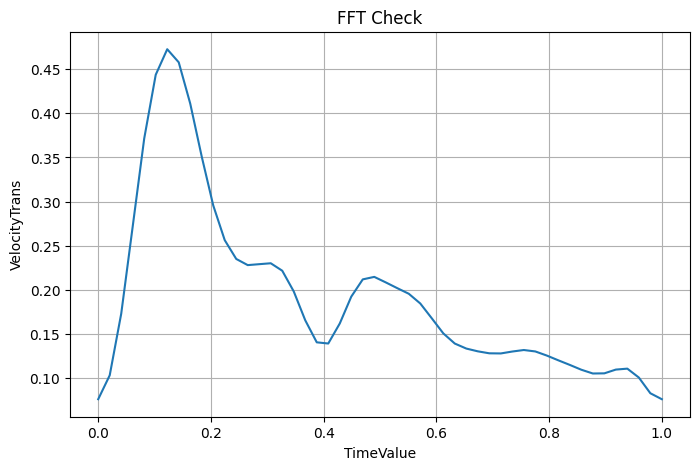

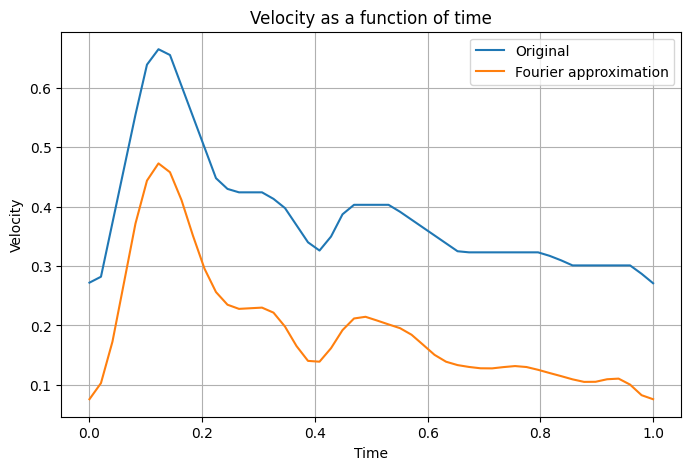

In [9]:
#Setting Up the Code for FFT 
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
#UDF Provided by Dr. Espino
def velocity(t):
    if t < 0.019:
        return 0.223*t + 0.272
    elif t < 0.1:
        return 4.456*t + 0.191
    elif t < 0.133:
        return 1.273*t + 0.509
    elif t < 0.229:
        return -2.54*t + 1.018
    elif t < 0.257:
        return -0.446*t + 0.539
    elif t < 0.31:
        return 0.424
    elif t < 0.343:
        return -0.637*t + 0.621
    elif t < 0.4:
        return -1.411*t + 0.887
    elif t < 0.419:
        return 0.446*t + 0.144
    elif t < 0.448:
        return 1.931*t - 0.478
    elif t < 0.467:
        return 0.891*t - 0.013
    elif t < 0.533:
        return 0.403
    elif t < 0.657:
        return -0.651*t + 0.750
    elif t < 0.800:
        return 0.323
    elif t < 0.857:
        return -0.371*t + 0.620
    elif t < 0.962:
        return 0.301
    else:
        return -0.78*t + 1.051

#Generating the array of velocity values 
Time = np.arange(0, 1.01, 0.01) 
Velocity = np.array([velocity(ti) for ti in Time])
print(Velocity)
#Converting the velocity values into Fourier Coefficients for UDF
Velocity = np.array([0.272, 0.27423, 0.28012, 0.32468, 0.36924, 0.4138, 0.45836, 0.50292, 0.54748, 0.59204, 0.6363, 0.64903, 0.66176, 0.67449, 0.6624, 0.637, 0.6116, 0.5862, 0.5608, 0.5354, 0.51, 0.4846, 0.4592, 0.43642, 0.43196, 0.4275, 0.424, 0.424, 0.424, 0.424, 0.424, 0.42353, 0.41716, 0.41079, 0.40442, 0.39315, 0.37904, 0.36493, 0.35082, 0.33671, 0.3224, 0.32686, 0.33302, 0.35233, 0.37164, 0.38795, 0.39686, 0.403, 0.403, 0.403, 0.403, 0.403, 0.403, 0.403, 0.39846, 0.39195, 0.38544, 0.37893, 0.37242, 0.36591, 0.3594, 0.35289, 0.34638, 0.33987, 0.33336, 0.32685, 0.323, 0.323, 0.323, 0.323, 0.323, 0.323, 0.323, 0.323, 0.323, 0.323, 0.323, 0.323, 0.323, 0.323, 0.3232, 0.31949, 0.31578, 0.31207, 0.30836, 0.30465, 0.301, 0.301, 0.301, 0.301, 0.301, 0.301, 0.301, 0.301, 0.301, 0.301, 0.301, 0.2944, 0.2866, 0.2788, 0.271])
X = fft(Velocity) 
# Same time steps used for obtaining the velocity
Time = 0.01 
Number_points = len(Velocity)  
#Frequency range and how its sampled
frequency = np.linspace(0, 0.01/Time, Number_points)  
omega = 2*np.pi*frequency  
#Real Part 
coefficient_a = X.real
# Imaginary part 
coefficient_b = X.imag 
# Takes the average velocity which is coeff 0
coefficient_a0 = np.mean(Velocity) 
#Number of coefficients to generate
coefficients = [(2*coefficient_a[i]/Number_points,2*coefficient_b[i]/Number_points) for i in range(1, 11)] #
#Prints out the coefficients to be used in FFT
print('coefficient_a0:', coefficient_a0)
for i, (coefficient_ai, coefficient_bi) in enumerate(coefficients, start=1):
    print(f'coefficient_a{i}:', coefficient_ai, f'coefficient_b{i}:', coefficient_bi)
#Setting up the plot to check if FFT looks as expected
Time = np.linspace(0, 1.0)
coefficient_ax = [0.387241089108911, 0.015605625219499698, -0.015081039046203535, -0.05274105942475998, -0.027972212826500135, -0.03112101979790356, -0.0017858016669007265, -0.0014013033519438536, -0.0028894243388754666, 0.0016362788880600004, -0.002075602187660085]
coefficient_bx = [0, 0.09027003048994994, 0.07111914934334436, 0.023348947329378606, 0.007986546611109278, -0.018554527506972247, -0.019017833109397076, -0.001976454081570116, -0.006029614426666427, -5.164393578841917e-05, -0.0010755024677887198]
x = ((coefficient_a0 / 2) + sum([coefficient_ax[n]*np.cos(2*np.pi*n*Time) + coefficient_bx[n]*np.sin(2*np.pi*n*Time) for n in range(1, 11)]))
#Plot Settings
plt.figure(figsize=(8, 5))
plt.plot(Time, x)
plt.xlabel('TimeValue')
plt.ylabel('VelocityTrans')
plt.title('FFT Check')
plt.grid(True)
plt.show()
# Combine Dr. Espinos code with new one 
vx = np.array([velocity(ti) for ti in Time])
plt.figure(figsize=(8, 5))
plt.plot(Time, vx, label='Original')
plt.plot(Time, x, label='Fourier approximation')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity as a function of time')
plt.legend()
plt.grid(True)
plt.show()


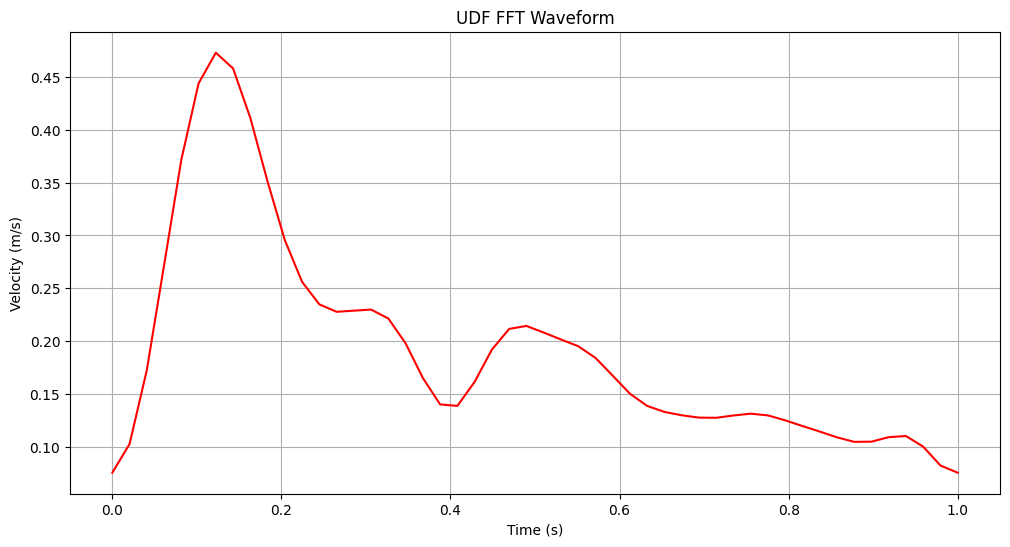

In [33]:

# Time array
t = np.linspace(0, 1)

# Fourier coefficients
a = [0.387241089108911, 0.015605625219499698, -0.015081039046203535, -0.05274105942475998, -0.027972212826500135, -0.03112101979790356, -0.0017858016669007265, -0.0014013033519438536, -0.0028894243388754666, 0.0016362788880600004, -0.002075602187660085]
b = [0, 0.09027003048994994, 0.07111914934334436, 0.023348947329378606, 0.007986546611109278, -0.018554527506972247, -0.019017833109397076, -0.001976454081570116, -0.006029614426666427, -5.164393578841917e-05, -0.0010755024677887198]

# Calculate the Fourier series up to the 10th harmonic
y = a[0] / 2 + sum([a[n]*np.cos(2*np.pi*n*t) + b[n]*np.sin(2*np.pi*n*t) for n in range(1, 11)])

# Plot the result
plt.figure(figsize=(12, 6))
plt.plot(t, y, c='red')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('UDF FFT Waveform')
plt.grid(True)
plt.show()
